# 1.

The theoetical Simple Linear Regression model is a statistical tool about the relationship between a predictor variable ($x_i$) and outcome variable ($Y_i$), assuming that this relationship can be approximated by a straight line, where changes in the predictor variable correspond to changes in the outcome variable on average.

- Predictor Variable (x): the independent variable that influence the outcome variable
- Outcome Variable (Y): the dependent variable that the model aims to predict or explain its value based on the predictor variable

$\Large Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, where $\epsilon_i \sim \mathcal{N}(0, \sigma)$

- Outcome variable ($Y_i$): the outcome variable for the i-th data point
- Predictor vatiable ($x_i$): the outcome variable for the i-th data point
- Intercept coefficient ($\beta_0$): when the predictor value, which is $x_i$ is 0, then intercept coefficient is the average value of the outcome.
- Slope coefficient ($\beta_1$): the slope of predictor variable (the average change in the outcome variable)
- Error term ($\epsilon_i$): represents the random variation in the outcome variable that isn't explained by the linear relationship with the predictor variable. The error term is assumed to follow a normal distribution with a mean of zero and a std of $\sigma$

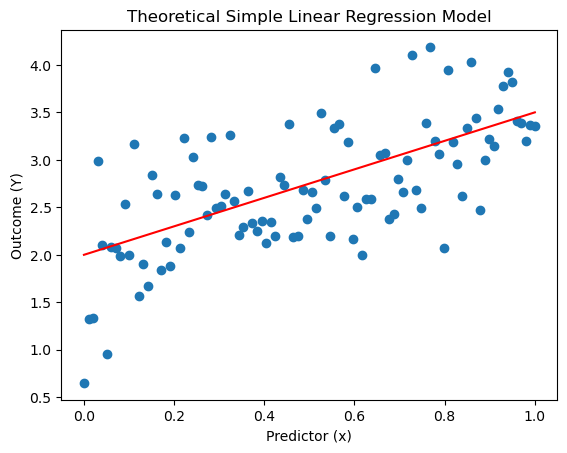

In [56]:
import numpy as np
from scipy import stats

# Set parameters for the theoretical model
n = 100       # Sample size
beta0 = 2     # Intercept coefficient
beta1 = 1.5   # Slope coefficient
sigma = 0.5   # Standard deviation of the error term

# Generate predictor variable values (fixed for illustration)
x = np.linspace(0, 1, n) 

# Generate error term values from a normal distribution
epsilon = stats.norm.rvs(loc=0, scale=sigma, size=n)

# Calculate outcome variable values based on the model
Y = beta0 + beta1 * x + epsilon

# Visualization (using matplotlib, for example)
import matplotlib.pyplot as plt
plt.scatter(x, Y)  # Scatter plot of the data points
plt.plot(x, beta0 + beta1 * x, color='red')  # Line representing the theoretical model
plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (Y)')
plt.title('Theoretical Simple Linear Regression Model')
plt.show()

- The predictor variable, x values, are sampled from a uniform distribution using stats.uniform.rvs()
- The error term, epsilon values, are sampled from a normal distribution using stats.norm.rsv()
- The outcome variable, Y values, are generated by coming the linear component with the random error term.

The results are distributed normally around the line drfined by the intercept and slope

## NotebookLM summary

Okay, here is a summary of our conversation:

*   You began by asking how to generate a graph using some code that you provided. This code simulated data from a theoretical simple linear regression model. The response explained how to integrate that code with Plotly Express to create a scatter plot with a fitted regression line. The response included a detailed breakdown of the code and emphasized the distinction between the **theoretical model**, defined by the parameters you set, and the **fitted model** estimated by Plotly Express from the data. It also explained that the fitted model is generated using **ordinary least squares (OLS)**, which minimizes the sum of squared differences between observed and predicted values.
*   You then asked for an explanation of the theoretical simple linear regression model. You requested a description of its components—predictor and outcome variables, slope and intercept coefficients, and the error term—and how these combine to form a sample from a normal distribution. You also asked for Python code demonstrating these concepts.
*   The response provided an explanation of the Simple Linear Regression model, outlining its components and the equation $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$ that represents the linear relationship. The error term's normal distribution was highlighted, with the equation $\epsilon_i \sim \mathcal{N}(0, \sigma)$ . The response then presented Python code using NumPy and SciPy.stats to simulate data according to this model. The code generated predictor values (`x`) from a uniform distribution, error term values (`epsilon`) from a normal distribution, and then calculated outcome variable values (`Y`) using the simple linear regression equation. The response emphasized that this code simulates data based on a theoretical model with predefined parameters, different from a fitted model that estimates these parameters from observed data.

The sources provided discuss various statistical concepts and tools related to data analysis, including:

*   Importing libraries like *pandas*
*   Loading data with *pd.read\_csv()*
*   Counting missing values using *df.isna().sum()*
*   Understanding observations (rows) and variables (columns) using *df.shape* and *df.columns*
*   Distinguishing numeric and non-numeric data using *df.describe()* and *df.value\_counts()*
*   Handling missing data with *df.dropna()* and *del df\['col'\]*
*   Grouping and aggregation with *df.groupby("col1")\["col2"\].describe()*
*   Data visualization tools and techniques such as bar plots, histograms, box plots, and kernel density estimators
*   Concepts of populations and sampling, including bootstrapping
*   Statistical inference, including hypothesis testing and p-values
*   Simple Linear Regression, its assumptions, model fitting, and interpretation

While the sources cover many concepts relevant to our conversation, they do not explicitly mention Plotly Express, which was used in the code example. You might want to verify independently the usage and features of Plotly Express.

# 2.

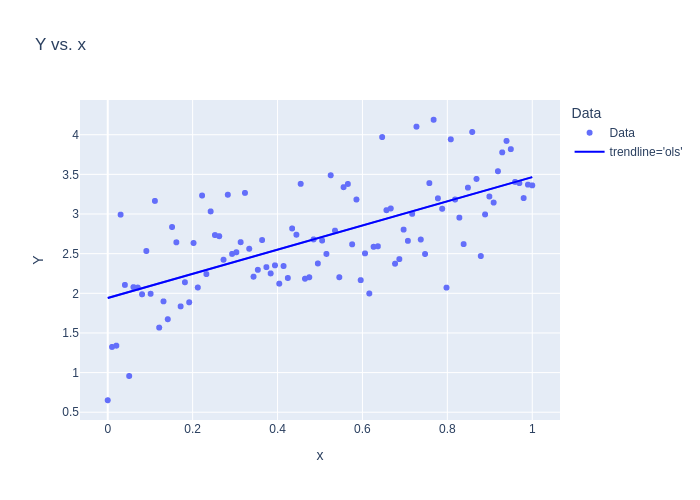

In [57]:
import statsmodels.formula.api as smf  
# imports the statsmodels library, specifically the formula.api sub-module -> smf 
# The statsmodels libary offers tools like linear regression

import plotly.express as px  # this is a ploting library
import pandas as pd

df = pd.DataFrame({'x': x, 'Y': Y})
# using the x and Y generated in question 1

model_data_specification = smf.ols("Y~x", data=df) 
# specifies a simple linear regression model using the stasmodel library
# Y represents the outcome variable, x represents the predictor variable, and df is our dataframe for the variables

fitted_model = model_data_specification.fit() 
# applies the ordinary least squares method to find the best-fitting line through the data points

fitted_model.summary() 
# provides a comprehensive stat sumamary of the fitted model
# such as estimated coefficients, standard errors, t-statistics, p-values, r-squared, residual diagnostics

fitted_model.summary().tables[1]
# generates a table containing coefficients, standard errors, t-statistics, and p-values

fitted_model.params
# gives intercept and slope values for a simple linear regression model

fitted_model.params.values
# returns a NumPy array holding values of the estimated model parameters (the two values above)

fitted_model.rsquared 
# provides r-squared value of the fitted model (a measure of how well the xi explains Yi)


df['Data'] = 'Data' # hack to add data to legend 
# addas a new column 'Data' and fills it with the string 'Data'

fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')
# creates a scatter plot
# trendline addas a trendline based on the ordinary least squares method


# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## NotebookLM summary 
This conversation focused on understanding a code snippet that fits a simple linear regression model and visualizes it using Python libraries. You asked about the purpose of specific libraries and code lines, as well as the meaning of various outputs from the fitted model.

Here's a breakdown of the conversation:

*   **Libraries:** You correctly identified `plotly.express` as a plotting library. The conversation clarified that `statsmodels.formula.api` is used for statistical modeling, specifically fitting linear regression models.

*   **Model Fitting:** The code `model_data_specification = smf.ols("Y~x", data=df)` and `fitted_model = model_data_specification.fit()` specifies and fits the simple linear regression model to data in a dataframe `df`. The first line defines the model, predicting variable 'Y' using 'x', and the second line estimates the model parameters (intercept and slope) to best fit the data.

*   **Model Outputs:** The conversation explained the following outputs from the fitted model:
    *   `fitted_model.summary()`: Provides a complete summary of the regression results, including statistical tests, coefficients, and model diagnostics.
    *   `fitted_model.summary().tables`: Extracts a specific table from the summary, showing coefficients, standard errors, t-statistics, and p-values, which assess the evidence against the null hypothesis of a zero coefficient.
    *   `fitted_model.params`: Returns a pandas Series containing the estimated intercept (`β0`) and slope (`β1`) of the fitted model.
    *   `fitted_model.params.values`: Provides a NumPy array with the numerical values of the intercept and slope.
    *   `fitted_model.rsquared`: Returns the R-squared value, indicating the proportion of variance in 'Y' explained by 'x', with higher values indicating a better fit.

*   **Visualization:** The code creates a scatter plot of the data and adds a trendline representing the fitted model. It also ensures the data points are labeled in the legend. The alternative method using  `fig.add_scatter(...)`  achieves the same trendline visualization, but `trendline='ols'` within `px.scatter()` is a more concise approach.

The sources you provided do not offer specific code examples for simple linear regression using these libraries, but they do discuss the general concept of simple linear regression. The information provided about these specific libraries and their use in this context comes from general knowledge of these libraries and is not directly derived from your provided sources. You may want to consult additional resources or documentation for these libraries to verify this information.


# 3.

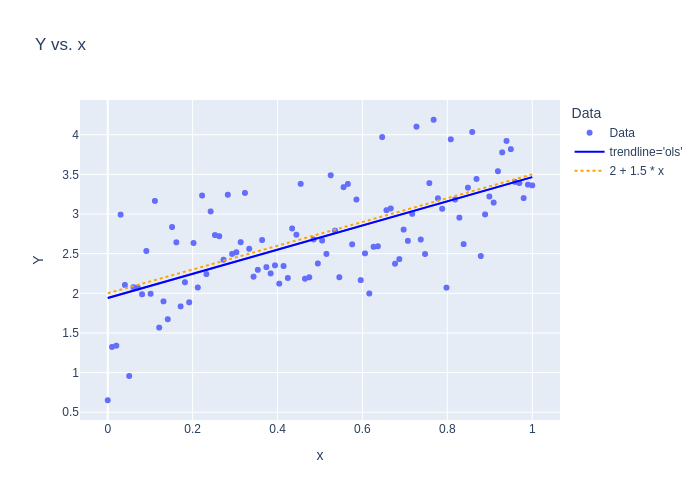

In [59]:
import statsmodels.formula.api as smf  
# imports the statsmodels library, specifically the formula.api sub-module -> smf 
# The statsmodels libary offers tools like linear regression

import plotly.express as px  # this is a ploting library

model_data_specification = smf.ols("Y~x", data=df) 
# specifies a simple linear regression model using the stasmodel library
# Y represents the outcome variable, x represents the predictor variable, and df is our dataframe for the variables

fitted_model = model_data_specification.fit() 
# applies the ordinary least squares method to find the best-fitting line through the data points

fitted_model.summary() 
# provides a comprehensive stat sumamary of the fitted model
# such as estimated coefficients, standard errors, t-statistics, p-values, r-squared, residual diagnostics

fitted_model.summary().tables[1]
# generates a table containing coefficients, standard errors, t-statistics, and p-values

fitted_model.params
# gives intercept and slope values for a simple linear regression model

fitted_model.params.values
# returns a NumPy array holding values of the estimated model parameters (the two values above)

fitted_model.rsquared 
# provides r-squared value of the fitted model (a measure of how well the xi explains Yi)


df['Data'] = 'Data' # hack to add data to legend 
# addas a new column 'Data' and fills it with the string 'Data'

fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')
# creates a scatter plot
# trendline addas a trendline based on the ordinary least squares method


# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")



# what does this add onto the figure in constrast to `trendline='ols'`?
x_range = np.array([df['x'].min(), df['x'].max()])
# defines the x-coordinates for the theoretical line
# creates a NumPy array containing the min and max values from the 'x' column of df

# beta0 and beta1 are assumed to be defined
y_line = beta0 + beta1 * x_range
# calculates the y-coordinates for the thoretical line 
# applies this equation to the previously defined x-range, resulting the corresponding y_line

fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

The new added-on code represents a theoretical linear relationship. 

The main difference between this code and using trendline = 'ols' is that this code plots a predeterminde line based on our beta0 and beta1, while trendline calculates the line of best fit from the data using OLS method.

- The orange dashed line represents the line based on beta0 and beta1 that are defined on the top (in the first question code). 
- The blue line represents the fitted model that's generated by the trendline <br><br>


- The theoretical model is already defined; we already know the underlying relationship without any sampling variability
- The fitted model estimated from the observed data, capturing random sampling variation

The closer the fitted model is to the theoretical model, the less impact randomness has had on our analysis.

## NotebookLM summary
### Summarizing Our Conversation about Theoretical and Fitted Models

Our conversation focused on clarifying the relationship between theoretical models and fitted models, particularly in the context of simulations. We discussed how these models are used to understand the impact of random sampling variation on statistical inferences.

**Key Points from Our Conversation:**

*   **Theoretical Model as Ground Truth:**  The theoretical model serves as a benchmark in simulations because we predefined its parameters, allowing us to know the true underlying relationship. It represents the ideal scenario without sampling variability.

*   **Fitted Model Captures Sampling Variability:** The fitted model is estimated from observed data, which are subject to random sampling variation. Different samples, even from the same population, can lead to different fitted models. This variation highlights the inherent uncertainty in statistical inference based on samples.

*   **Comparison to Assess Accuracy:** The comparison between fitted and theoretical models helps us understand how well our statistical method recovered the true relationship from data. A close match suggests the method performed well, while discrepancies indicate potential issues like violated assumptions or high sampling variability.

*   **Understanding "Correctness":** We established that the theoretical model is not necessarily "correct" in an absolute sense. It's a simplification based on chosen parameters and assumptions. The fitted model aims to approximate this theoretical model, and its closeness to the theoretical model reflects the accuracy of the statistical analysis.

*   **Simulation for Controlled Exploration:** Simulations provide a controlled environment to explore statistical concepts. By repeatedly generating data from a known theoretical model, we can see how different samples affect the fitted model and learn about the properties of statistical methods.

*   **Confidence Intervals Quantify Uncertainty:** Confidence intervals provide a range of plausible values for population parameters, helping us quantify the uncertainty in our parameter estimates and providing a more nuanced view of the fitted model's accuracy.

**Connection to the Provided Sources:**

The sources reinforce these concepts by:

*   **Emphasizing the Importance of Simulation:** The sources highlight simulation as a key tool for understanding statistical concepts like sampling variability, confidence intervals, and hypothesis testing.

*   **Providing Illustrative Examples:** The sources offer specific examples of simulating sampling distributions, bootstrapping, and permutation testing, showcasing how these techniques help us understand the role of randomness in statistical inference.

*   **Discussing Model Assumptions and Diagnostics:** The sources stress the importance of checking model assumptions using residuals. This aligns with our discussion about how violated assumptions can impact the accuracy of the fitted model.

**Overall Takeaway:**

By comparing fitted models to theoretical models, especially within simulations, we gain crucial insights into the reliability and limitations of our statistical methods when applied to real-world data. The conversation and the sources emphasize the fundamental role of random sampling variation and the need to quantify uncertainty in our statistical inferences. This understanding is essential for sound statistical reasoning and data analysis.

# 4.

Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values

1. We have the Simple Linear Regression Model
Each variable has been explained above.

2. The fitted model coefficients ($\hat \beta_0$ and $\hat \beta_1$) are estimated from the observed data using methods like ordinary least squares (OLS) and are found in fitted_model.summary().tables or accessed directly through fitted_model.params.

3. Calculating the fitted values
Then we can calculate the fitted values by fitted_model.fittedvalues for each observation using the equation:

$\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$

For each observation i, we plug in predictor variable and estimated coefficients to get the outcome value.

In conclusion, we get the estimated coefficients by the fitted_model.summary().tables[1], then we plug in our predictor values to get the fitted values.

## NotebookLM summary

### Fitted Values from Estimated Coefficients

The sources and our conversation history explain the process of deriving `fitted_model.fittedvalues` based on `fitted_model.summary().tables` (specifically `fitted_model.params` or `fitted_model.params.values`) in the context of **Simple Linear Regression**. Here's a breakdown:

1.  **Estimated Coefficients**: The `fitted_model.summary().tables` (or equivalently `fitted_model.params`) provides the estimated intercept ($\hat{\beta}_0$) and slope ($\hat{\beta}_1$) coefficients of the fitted Simple Linear Regression model. These coefficients represent the line that best fits the observed data points, minimizing the sum of squared residuals.

2.  **Fitted Model Equation**: These estimated coefficients are then used in the fitted model equation: $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$. This equation is used to calculate the predicted values, or `fitted_model.fittedvalues`.

3.  **Calculate Predicted Values**: For each observation in your dataset, you take the corresponding predictor value ($x_i$) and substitute it into the fitted model equation along with the estimated coefficients. This calculation gives you the predicted outcome value ($\hat{y}_i$) for that observation. 

    *   These $\hat{y}_i$ values, calculated for all observations, constitute the `fitted_model.fittedvalues` attribute.
    *   The sources refer to these as "in-sample predictions" because they are predictions made for the same data points used to estimate the fitted model.

#### Example:

Let's say your fitted model for predicting a child's height based on their parent's average height (`child_height ~ parent_height`) results in the following estimates in `fitted_model.params`:

*   Intercept ($\hat{\beta}_0$): 25
*   `parent_height` ($\hat{\beta}_1$): 0.6

To obtain the `fitted_model.fittedvalues` you would do the following:

1.  **For each observation**, take the value of `parent_height`. Let's say for one observation, `parent_height` is 70.
2.  **Plug the values** into the fitted model equation: $\hat{y}_i = 25 + 0.6 \times 70 = 67$
3.  **The resulting value**, 67, is the predicted `child_height` ($\hat{y}_i$) for that observation.
4.  **Repeating this** for all observations in your dataset gives you the complete set of `fitted_model.fittedvalues`.

#### Distinction from Residuals:

While `fitted_model.fittedvalues` are the predicted values, it is important to distinguish them from the **residuals** (`fitted_model.resid`). Residuals represent the differences between the observed outcome values ($y_i$) and the predicted values ($\hat{y}_i$). In our example, if the observed `child_height` for the individual with `parent_height` of 70 was actually 69, the residual would be 69 - 67 = 2. 

#### Key Points:

*   `fitted_model.fittedvalues` are derived directly from the estimated coefficients of the fitted model.
*   They represent the predicted outcome values based on the predictor values and the fitted model's equation.
*   Residuals, on the other hand, measure the deviation of the observed values from these predicted values. 
*   Understanding this distinction is crucial for interpreting the results of a Simple Linear Regression model and assessing its goodness of fit. 

### Error Terms, Residuals, and Fitted Models

The fitted model equation aims to represent the line that best fits the observed data points, determined by minimizing the sum of squared residuals. The equation does not explicitly include residuals because it focuses on predicting the average outcome value based on the predictor variable. Residuals provide insights into how individual data points deviate from this average trend. Error terms represent the randomness in the data-generating process and are unobservable, while residuals, calculated based on observed data and the fitted model, estimate those error terms.  The distribution of residuals is used to assess assumptions like normality and homoscedasticity of the error terms. 

# 5.

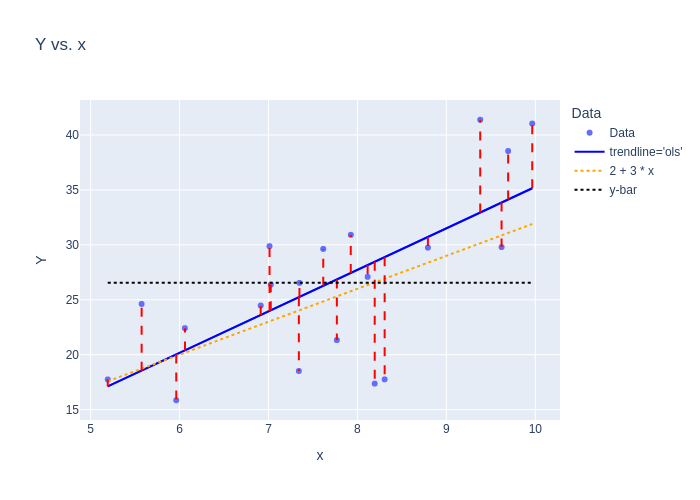

In [60]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")

Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

Code Breakdown:
- simulating df with a linear relationship between 'x' and 'y' (including random errors)
- model fitting performs the actual model fitting using OLS, indicating that 'Y' is the outcome variable and 'x' is the predictor variable
- .fit() method applis OLS to find the best-fit line by minimizing the sum of squared residuals
- trendline adds the fitted regression line to the plot, visually representing the best-fit line determined by OLS <br><br>

- the vertical lines are the residuals
- **OSL: aims to minimize the overall error of the model by minimizing the sum of the squared residuals. Squaring them before adding them up in order to eliminate negative values and emphasize larger errors.**
<br><br>

**The blue trendline is the line that's chosen for the fitted model based on observed data using 'OLS' method.**


## NotebookLM summary
### Summary of the OLS Method Code

The OLS method code you provided uses simulation to illustrate the difference between a true (theoretical) linear relationship and the line fitted to observed data using the OLS method. Here's a breakdown of the key components:

*   **Simulating Data:** The code generates a dataset (`df`) based on a theoretical simple linear regression model. It defines a range for the predictor variable 'x' (`x_range`) and uses specified values for the intercept ($\beta_0$), slope ($\beta_1$), and standard deviation of the errors ($\sigma$) to simulate values for the outcome variable 'y' (`y_sim`). These simulated data points are then visualized in a scatter plot using `plotly.express`.

*   **Fitting the Model:** The code utilizes `statsmodels.formula.api as smf` to fit a simple linear regression model to the simulated data using OLS. The `smf.ols("y_sim~x_range", data=df)` line specifies the model, and the `.fit()` method applies OLS to estimate the coefficients of the fitted line. The fitted values are then added to the scatter plot, represented by the blue line.

*   **Visualizing the Theoretical Line:**  To compare the fitted model with the true relationship, the code also plots the theoretical line based on the specified intercept and slope values. This line is represented by the orange dotted line in the plot.

*   **Illustrating Sampling Variability:** The discrepancy between the blue (fitted) line and the orange (theoretical) line visually demonstrates the concept of sampling variability. The fitted model, estimated from a sample of data, will not perfectly match the true relationship due to random variation.  The OLS method aims to minimize the impact of this variability by finding the line that minimizes the sum of squared residuals.

**Key Observations from the Code and Our Conversation:**

*   The code helps visualize how the OLS method works by showing both the fitted line and the true theoretical line, making the distinction between them clear.

*   The visualization of residuals (red dashed lines) further emphasizes the goal of OLS, which is to minimize the overall length of these lines (after squaring them).

*   The code does not directly calculate or use the sample mean ($\bar{y}$), but the concept is implicitly relevant to OLS as one of the coefficients (the intercept) is calculated using the sample means of both the outcome and predictor variables.

*   The R-squared value, which can be accessed from the fitted model object (`fitted_model.rsquared`), quantifies how well the fitted model explains the variation in the outcome variable.  It is directly related to OLS as it reflects the degree to which the sum of squared residuals has been minimized.

# 6.

#### Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

R-squared (fitted_model.rsquared) indicates the 'proportion of variation in the outcome variable (Y)' explained by the fitted Simple Linear Regression model, represented by the fitted values(fitted_model.fittedvalues) 

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`

- Unexplained variation (the denominator): calculates R-squared directly by comparing the squared difference between the observed outcome values (Y) and their corresponding fitted values from the model (measures the protion of the variation in Y that the model fails to capture)
- Total variation (the numerator): the observed outcome values (Y) and the mean of the outcome variable (Y.mean())<br><br>
- **The above represents the ratio of unexplained variation to total variation. By subtracting the ratio from 1, we get the proportion of variation explained by the model** <br><br>

2. `fitted_model.rsquared`
- **'variation' relates to how spread out the data points are**
- quantifies how well the model's predictions align with the actual observed data
- higher r-squared indicates that the model's fitted values are closer to the observed outcome values
- **higher r-squared signifies that a larfer portion of the variability in the outcome is explained by the model, leaving a smaller portion unexplained**
- comparing the sum of the squared residuals to the total variation in the outcome variable, a higher r-squared corresponds to smaller residuals <br><br>


3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` 
4. `np.corrcoef(Y,x)[0,1]**2`

- calculating the square of the correlation coefficient in different contexts within a Simple Linear Regression model <br><br>
- 3. calculates the square of the correlation coefficient between the observed outcome values(Y) and the fitted values(predicted values) generated by the model (fitted_model.fittedvalues)
- 4. calculates the square of the correlation coefficient between the observed outcome values (Y) and the predictor variable (x), representing the strength of the linear association between the outcome and predictor variables in the original data without considering the fitted model <br><br>

- 4. quantifies how much the variation in Y can be explained by the linear relationship with x before fitting a regression model
- this value = the r-squared value of the fitted model since with the only one predictor variiable, the model's ability to explain variation in Y depends solely on the strength of the linear relationship between Y and x

## NotebookLM summary
### Discussing the Four Expressions and Their Relationship to Simple Linear Regression

Our conversation focused on clarifying the relationship between R-squared and model accuracy in the context of Simple Linear Regression.  We also examined four specific code expressions to understand their significance in measuring and interpreting the goodness-of-fit of the model.

You initially questioned whether a lower R-squared value suggests a more accurate model. We established that this is **incorrect**. Instead, a **higher R-squared generally points to a more accurate model** because it signifies that the model explains a greater proportion of the variation in the outcome variable (Y).

We then looked at the expression **`fitted_model.rsquared`**, which provides the R-squared value for a fitted model. This attribute directly quantifies the proportion of variation in Y accounted for by the model, making it a valuable measure of the model's accuracy and predictive power. A higher R-squared suggests that the model's predictions are closer to the actual outcome values.

You then asked for clarification on how the expression **`1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` calculates the R-squared and how it represents the "proportion of variation in Y explained by the model." We broke down this expression step-by-step, identifying the **denominator as the total variation** in Y and the **numerator as the unexplained variation** (sum of squared residuals). Subtracting the ratio of unexplained variation to total variation from 1 gives us the proportion of variation explained by the model.

Finally, we explored the meaning of the two `np.corrcoef(...)**2` expressions:

*   **`np.corrcoef(Y, fitted_model.fittedvalues)**2`**: This calculates the square of the correlation coefficient between the **observed outcome values (Y)** and the **fitted values** predicted by the model.  This expression directly computes the R-squared value for the fitted model.
*   **`np.corrcoef(Y, x)**2`**: This calculates the square of the correlation coefficient between the **observed outcome values (Y)** and the **predictor variable (x)** in the original data.

It's essential to understand that in **Simple Linear Regression**, **both of these expressions will result in the same value**, which is the R-squared of the fitted model. This equality holds true because the model's ability to explain variation in Y relies entirely on the linear relationship between the single predictor (x) and the outcome (Y). However, this relationship may not persist in **Multiple Linear Regression**, where multiple predictors are involved.

The sources you provided focus on various aspects of data analysis and visualization in Python, covering topics like data summarization, probability, coding, data visualization, and statistical concepts like populations and sampling, confidence intervals, and hypothesis testing. While the sources themselves do not directly address these specific code expressions or the detailed interpretation of R-squared, they provide a foundation for understanding the broader context of statistical modeling and data analysis in Python.  Many of the concepts we discussed in our conversation are explored in these sources, such as:

*   **Importing Libraries:** Sources discuss importing libraries like *pandas*, which is essential for data manipulation and analysis in Python.
*   **Loading Data:** Sources mention loading data using the command  *pd.read\_csv()*, a fundamental step in working with datasets in Python.
*   **Data Summarization:** Sources introduce various methods for summarizing data, including *df.describe()* and *df\['column'\].value\_counts()*, which are important for understanding the distribution of variables.

Understanding these fundamental concepts from the sources can help you interpret the results of a Simple Linear Regression model and the significance of R-squared in evaluating its accuracy.

# 7.

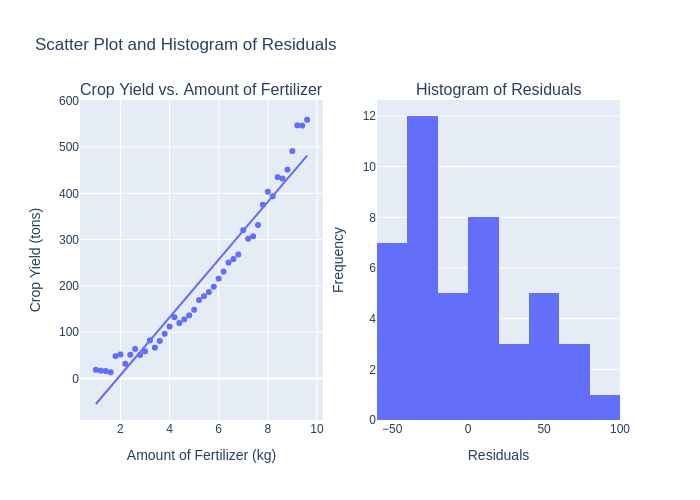

In [61]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below.

- The example data is not compatible with **Normality** since the histogram of residuals does not perform a bell-shaped curve centered around 0 and it's not symmetric.
- The example data is also not campatible with **Homoscedasticity** since the scatter plot of residuals above is not homoscedasticity. We said that if the spread of the residuals is roughly consistent across the range of fitted values, then it supports the assumption of homoscedasticity. However, the residuals are not evenly distribute around the fitted line. <br><br>

- The example data is compatible with Linearity though. Since the predictor variable (amount of fertilizer) x and the outcome variable (corn field) Y can be reasonably approximated by a straight line.

## NotebookLM summary
Our conversation has focused on the assumptions of Simple Linear Regression, particularly the assumptions of **normality**, **homoscedasticity**, and **linearity**.

*   You asked about the three assumptions of Simple Linear Regression and learned that the three primary assumptions are **normality**, **homoscedasticity**, and **linearity**.
*   You then asked what code you could use to examine the distribution of residuals to see if it is approximately normally distributed. You learned that you can use a histogram and a Q-Q plot. You were also reminded that normality is an assumption, not a guarantee, and that real data is rarely perfectly normal. The sources do not discuss how to deal with violations of the normality assumption.
*   You then asked how to test for homoscedasticity and learned that the sources do not outline specific methods for testing this. It was suggested that, although the sources do not explicitly mention this, you can visually inspect a scatter plot of residuals vs. fitted values to look for patterns in the spread of residuals. If the spread is roughly consistent across the range of fitted values, this supports the assumption of homoscedasticity. The sources do not discuss the limitations of visual inspection.
*   Finally, you asked how to examine if a dataset is compatible with the assumption of linearity. You were told that you can assess this by examining the scatter plot for an overall linear trend. The sources also mention that, in some cases, there may not be enough data to determine linearity from the scatter plot. You learned that Anscombe's Quartet is a set of four datasets with the same correlation coefficient but vastly different scatter plots, demonstrating that correlation alone is not enough to determine linearity. The sources do not discuss how to address violations of the linearity assumption.

Remember, while visual inspection of plots can provide useful insights into these assumptions, they might not always be definitive. Statistical tests and more advanced techniques exist to further assess these assumptions, but these are typically beyond the scope of introductory statistics courses like STA130.

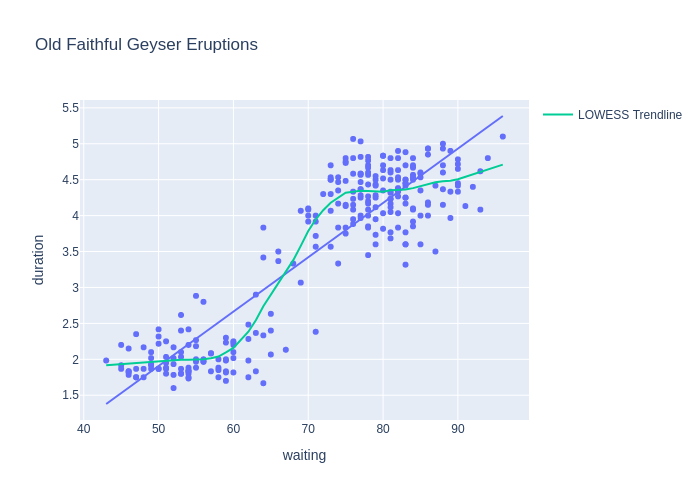

In [63]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# 8.

$\ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, where $\epsilon_i \sim \mathcal{N}(0, \sigma)$

Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

Null hypothesis: 'H<sub>0</sub>: β<sub>1</sub> = 0' where ß is the slope coefficient in the Simple Linear Regression Model -> 'no linear association (on average) / as one variable changes, the other isn't influenced / there is no relationship between the waiting time of eruptions and the duration of eruptions

Alternative hypothesis: 'H<sub>0</sub>: β<sub>1</sub> ≠ 0', meaning there is a linear association -> there is linear relationship between the waiting time of eruptions and the duration of eruptions

In [64]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:46:24   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By looking at the table, we can see that P-value = 0.000 in the waiting time row, suggesting very strong evidence against the null hypothesis. The p-value is associated with the null hypothesis of 'no linear association' between the waiting time since the last eruption and the duration of the current eruption.
- Observed that since the p-value is extremely small, there's a strong evidence against the null hypothesis, stating that **there is strong evidence to suggest that a linear relationship does exist between waiting time and eruption duration** <br><br>

Look at the 'waiting' row because our null hypothesis assumes that ß1 = 0

# 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


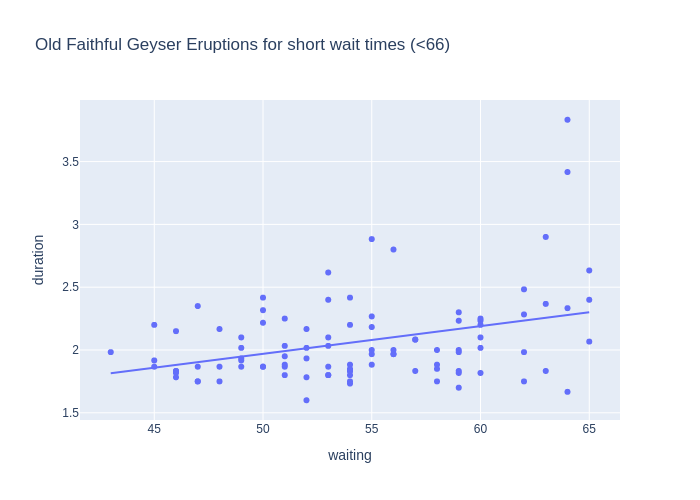

In [66]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Looking at the p-values of three graphs with three different numbers, we see that p-value decreases from 0.238 to 0.000, indicating that there is stronger evidence against the null hypothesis with our adjustment of wait times. <br><br>

Within the context of only short wait times, the evidence in the data for a relationship between duration and wait time has an amount of impact as in the full data set. 
- p-value when wait time < 62 -> 0.238 No evidence against the null hypothesis
- p-value when wait time < 64 -> 0.036 Moderate evidence against the null hypothesis
- p-value when wait time < 66 -> 0.000 Very strong evidence against the null hypothesis <br><br>

We can see that when we limit the short time to < 62, there is no evidence against the null hypothesis, implying that we **fail to reject the null hypothesis** that there is no linear relationship between the waiting time of eruptions and the duration of eruptions. <br><br>

Then, when we extend the range a little bit to make the waiting time to <64, p-value significantly decreases to 0.036, which is moderate evidence against the null hypothesis. <br><br>

At the end, when we extend a bit more to make the waiting time to <66, p-value drops to 0.000, same as our full data set, which suggests a strong evidence against the null hypothesis that there is no relationship between the waiting time of eruptions and the duration of eruptions.

## NotebookLM summary
### Summary of the Conversation About the Old Faithful Geyser

The conversation focused on analyzing the Old Faithful Geyser dataset using simple linear regression. You began by asking about "moderate evidence against the null hypothesis," which refers to a p-value between 0.01 and 0.05. This level of evidence suggests that the null hypothesis might not be true, but it's not definitive proof. 

The discussion then shifted to analyzing the relationship between eruption duration and waiting time in the Old Faithful Geyser dataset, specifically for long wait times (over 71 minutes). You provided code using the `plotly.express` library to create a scatter plot with a linear regression trendline. We then discussed how to:

*   Generate bootstrapped sampling distributions to understand the variability of the fitted slope coefficient across different bootstrap samples. 
*   Simulate sampling distributions under the null hypothesis to see what the distribution of slopes would look like if there were no linear association between waiting time and eruption duration. 
*   Calculate a 95% bootstrapped confidence interval to find a range of plausible values for the true population slope.
*   Determine a simulated p-value to assess the likelihood of observing the slope coefficient from the original data under the null hypothesis. 

The importance of interpreting p-values in conjunction with confidence intervals was also emphasized. Confidence intervals provide a more comprehensive understanding by offering a range of plausible values for the population parameter, helping us make more informed decisions about the null hypothesis. 

# 10.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


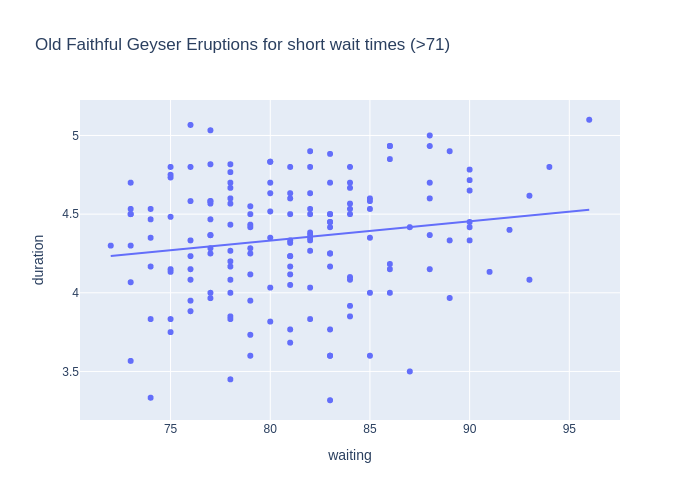

In [68]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


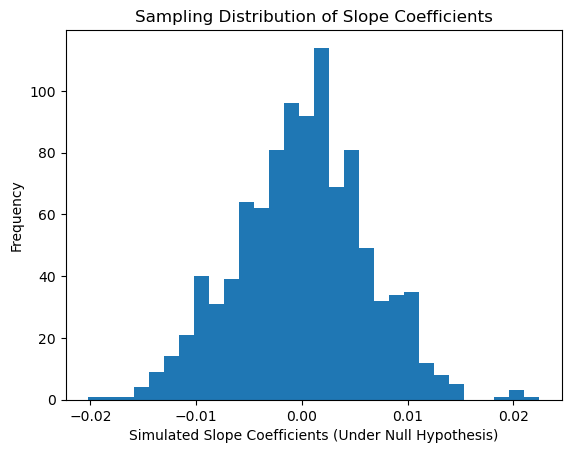

95% Bootstrapped Confidence Interval: [-0.01209155  0.0114496 ]
Contains 0: True
Simulated P-value: 0.045
Original p-value: 0.0381
Does the simulated p-value match the original p-value? No


In [69]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

old_faithful = sns.load_dataset('geyser')

# Define the threshold for long wait times
long_wait_limit = 71

# Create a boolean mask for long wait times
long_wait = old_faithful.waiting > long_wait_limit

original_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Parameters for the simple linear regression model under the null hypothesis
beta0 = 1.65
beta1 = 0  # Null hypothesis: no linear association
sigma = 0.37
n_simulations = 1000  # Choose a suitable number
n = 160  # Sample size

# Create an empty array to store the simulated slope coefficients
simulated_slope_coefficients = np.empty(n_simulations)

# Loop to generate bootstrap samples and fit models
for i in range(n_simulations):
    # Simulate a dataset under the null hypothesis
    simulated_data = pd.DataFrame({'waiting': old_faithful[long_wait].waiting.sample(n=n, replace=True)})
    simulated_data['duration'] = beta0 + beta1*simulated_data.waiting + stats.norm(loc=0, scale=sigma).rvs(size=long_wait.sum())
    
    # Fit a simple linear regression model to the simulated data
    fitted_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Extract and store the fitted slope coefficient
    simulated_slope_coefficients[i] = fitted_model.params['waiting']

    
# Visualize the sampling distribution of the simulated slope coefficients
plt.hist(simulated_slope_coefficients, bins=30)
plt.xlabel('Simulated Slope Coefficients (Under Null Hypothesis)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Slope Coefficients')
plt.show()

# Calculate the 95% bootstrapped confidence interval
bootstrapped_confidence_interval = np.quantile(simulated_slope_coefficients, [0.025, 0.975])

# Check if 0 is within the confidence interval using np.any()
zero_in_confidence_interval = np.any((bootstrapped_confidence_interval <= 0) & (0 <= bootstrapped_confidence_interval[1]))

# Calculate the simulated p-value
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()

# Print results
print(f"95% Bootstrapped Confidence Interval: {bootstrapped_confidence_interval}")
print(f"Contains 0: {zero_in_confidence_interval}")
print(f"Simulated P-value: {simulated_p_value}") 

# Compare the simulated p-value with the original model's p-value
original_p_value = original_model.pvalues['waiting']
tolerance = 0.0  # Define a tolerance level for matching

# Check if the p-values match within the specified tolerance
p_value_match = np.isclose(original_p_value, simulated_p_value, atol=tolerance)
print(f"Original p-value: {original_p_value:.4f}")
print(f"Does the simulated p-value match the original p-value? {'Yes' if p_value_match else 'No'}")

## NotebookLM summary
Let's summarize what we discussed in our conversation about bootstrapping, simulating, and confidence intervals, drawing on information in the sources you provided. 

### Bootstrapping, Simulations, and Confidence Intervals

*   You encountered an issue with `[nan, nan]` output when calculating a bootstrapped confidence interval. This output indicated the presence of `NaN` (Not a Number) values in the array storing the bootstrapped slope coefficients, ultimately causing the `np.quantile()` function to fail. 
*   You were provided with a three-step debugging process: (1) direct inspection of the array and verification of `NaN` presence, (2) tracing back through your code to identify the source of the `NaN` values, and (3) addressing missing data, if identified as the source.
*   Two primary options for handling missing data were presented: (1) data removal using `df.dropna()` (if appropriate and done cautiously), and (2) imputation (replacing missing values with estimated values), noting that specific imputation techniques are beyond the scope of the sources.
*   The sources explain how to access the p-value in fitted model output using `data_fitted_model.summary().tables` and referencing the  `P>|t|` column. They also explain how to interpret this p-value: a small p-value provides strong evidence against the null hypothesis while a large p-value does not.  

# 11.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


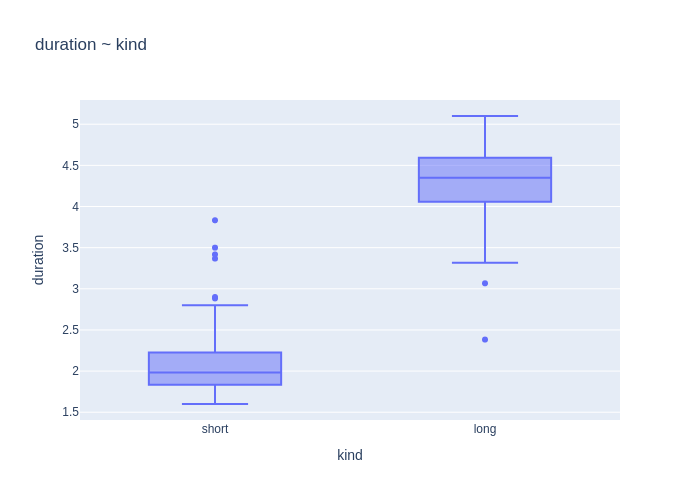

In [70]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Previously Consider Model:
- smf.ols('duration ~ waiting', data=old_faithful): analyzes the relationship between eruption duration and wait time using all data points
- smf.ols('duration ~ waiting', data=old_faithful[short_wait()]): fouces on the 'short' wait time group, which we say to be <68 right now
- smf.ols('duration ~ waiting', data=old_faithful[long_wait()]): analyzes the 'long' wait time group <br><br>

The main difference is 
- instead of xi, the indicator variable now is a categorical predictor (k_i), creating two distinct groups. 
- directly compares the average eruption durations between the 'short' and 'long' wait time groups while the other models only compare with specific groups <br><br>

The indicator variable, 1_{['long']}(k_i) takes on the **value 1 when the wait time (k_i) is classified as 'long' and 0 and it's 'short'** 

The ß_contrast coefficient then quantifies the average difference in eruption duration between these two groups

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$
​

**Reporting the evidence against the null hypothesis**

The null hypothesis in this case is 'no difference between groups on average' -> ß_contrast = 0

So, by looking at the table provided above, the p-value is 0.000, suggesting a very strong evidence against the null hypothesis. So, we conclude that there is a statistically significant difference in the average eruption duration between eruptions between the 'short' wait time and 'long' wait time.

Note: C(kind, Treatment(reference="short"))[T.long] indicates that the kind variable is being treated as a categorical variable in the regression model with 'short' category designated as the reference level. And [T.long] selects the coefficient associated with the 'long' category of the kind variable.

The coefficient of this output is 2.2036, meaning that on average, eruptions following 'long' wait times are 2.2046 minutes longer than eruptions following 'short' wait times

## NotebookLM summary
## Examining Group Differences in Eruption Durations with an Indicator Variable Model

This conversation has centered around understanding the concept of group comparisons within the context of *Simple Linear Regression* using indicator variables. The focus has been on interpreting an indicator variable model applied to the `old_faithful` dataset, which seeks to determine if there's a significant difference in eruption duration between eruptions with "short" and "long" waiting times.

You initiated the conversation by presenting code that fits this indicator variable model and providing its output.  The model utilizes a categorical predictor,  `kind`, which is represented as an indicator variable in the model.  This sparked a discussion about the interpretation of the coefficient `C(kind, Treatment(reference="short"))[T.long]`, which quantifies the average difference in eruption duration between eruptions with "long" waiting times (the treatment group) compared to those with "short" waiting times (the reference group).  We established that this coefficient, 1.9332, suggests that, on average, eruptions following "long" wait times are 1.9332 minutes longer than those following "short" wait times.

The conversation then shifted towards contrasting this indicator variable model with three previously explored *Simple Linear Regression* models:

1.  A model analyzing the relationship between eruption duration (`duration`) and waiting time (`waiting`) across the entire dataset.
2.  A model examining the same relationship specifically within the "short" wait time group.
3.  A model focusing on the relationship within the "long" wait time group.

The key distinction highlighted was that the indicator variable model directly compares the average eruption durations between the two groups, while the simple linear regression models concentrate on modeling the linear relationship between `duration` and `waiting` without direct group mean comparisons.

The conversation progressed to interpreting the evidence against the null hypothesis of no average difference in eruption duration between groups.  The p-value associated with `C(kind, Treatment(reference="short"))[T.long]` being 0.000 provided very strong evidence against the null hypothesis, leading to the conclusion that a statistically significant difference exists in average eruption duration between the two groups.

We also briefly touched upon the value of constructing a bootstrapped confidence interval for the `β_contrast` coefficient. This would allow for estimating the magnitude of the difference between group means while accounting for uncertainty, complementing the hypothesis test results.

Finally, we engaged in a discussion regarding residual analysis and its importance in assessing the assumptions of the *Simple Linear Regression* model, specifically focusing on the assumption of normality of error terms. We acknowledged the role of histograms as visual aids in evaluating the distribution of residuals and their alignment with a normal distribution.  This tied back to Question 12 from your sources, which tasked you with identifying the histogram suggesting the plausibility of normally distributed error terms.

Overall, this conversation has effectively demonstrated the application and interpretation of an indicator variable model within *Simple Linear Regression* for comparing group means, while also emphasizing the critical role of residual analysis in model diagnostics. 


# 12.

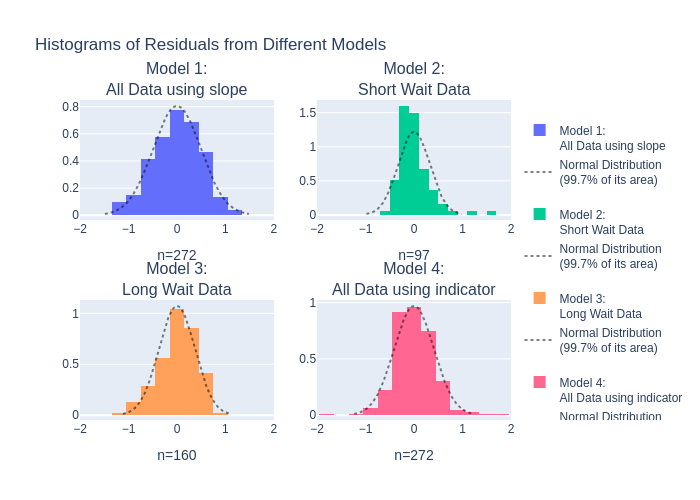

In [72]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The assumption of normality for the error terms in Simple Linear Regression means 
- the differences between the observed values and the values predicted by the regression line should be randomly distributed and followed a bell-shaped curve

For model 2, the center is not at 0. Since we're talking about normality, the center of the histogram should ideally be close to zero, which suggest that the model is predicting the outcome variable accurately on average. Therefore, it's not model 2.

For model 4, it shows slightly right skewed, which does not follow a bell-shaped compared to the others.

Also, by looking at the residuals graphs below, we can see that model 1 has a straight line which indivates the data is normally distributed while model 3 is a bit far with the fitted values when it goes to extreme sides. 

Therefore, **model 1** suggest the plausibility of the assumption that the distribution of error terms is normal. 

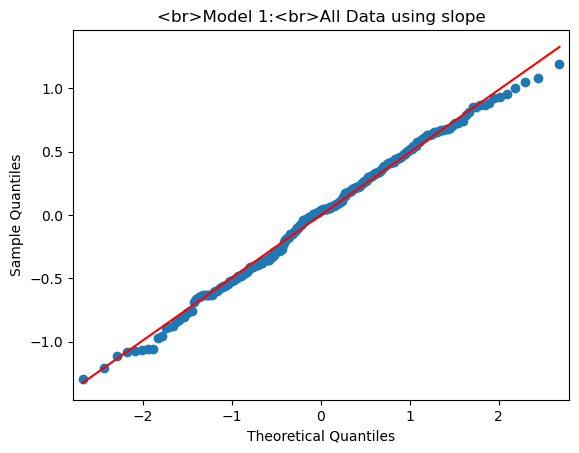

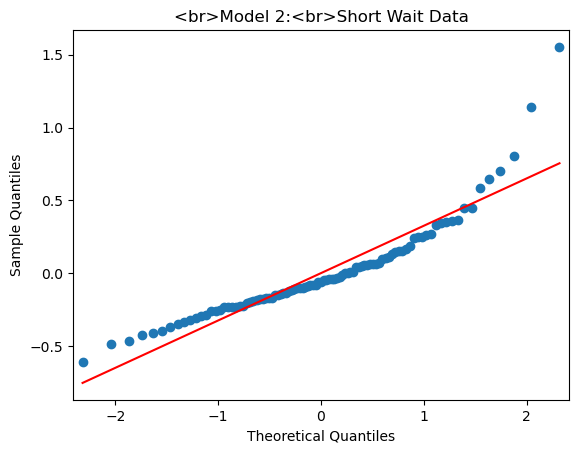

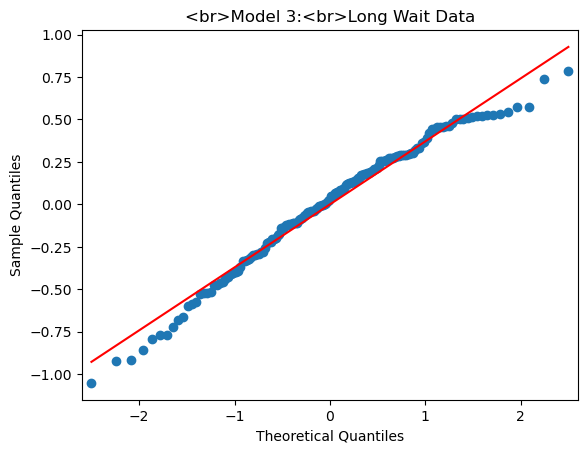

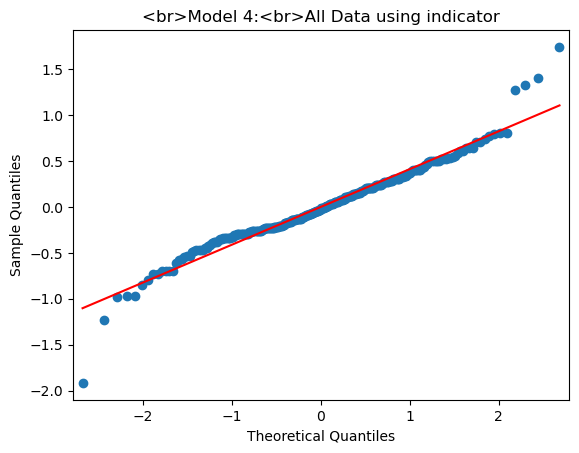

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'model_residuals' is your dictionary of residuals

for i, (title, resid) in enumerate(model_residuals.items()):
    fig = sm.qqplot(resid, line='s')
    plt.title(title)
    plt.show()

## NotebookLm summary
## Determining Which Residual Histogram Suggests Normality

The four histograms you generated show the distribution of residuals from four different simple linear regression models fitted to the Old Faithful Geyser dataset. These histograms were created to assess the assumption of normality for the error terms in each model.

You noted that **Model 3 (Long Wait Data) appears to be the closest to a normal distribution**, as its histogram most resembles the bell-shaped curve.  The histogram's peak aligns with the center of the overlaid normal distribution curve, and the data points are concentrated around the center, tapering off symmetrically towards the tails.

However, the other three models deviate from normality:

*   **Models 1 and 4 (All Data using slope and All Data using indicator):** Both histograms exhibit **bimodality**, meaning they have two distinct peaks. This pattern suggests that the data may come from two separate distributions, violating the normality assumption.

*   **Model 2 (Short Wait Data):** This histogram exhibits **left skewness**, with the tail on the left side extending further out than expected in a normal distribution. This uneven distribution of residuals around the mean indicates a potential violation of normality.

We then discussed **how to describe the slight asymmetry present in Model 4's histogram**, acknowledging that while bimodality is the dominant feature, the right peak appears slightly taller and narrower than the left peak. This subtle difference suggests a minor degree of right skewness, although interpreting skewness in multimodal distributions is complex.

Finally, we discussed using Q-Q plots to assess normality. I provided code using the `statsmodels` library to generate Q-Q plots for all four models. We reviewed how to interpret these plots, noting that points falling along a straight diagonal line indicate normality, while deviations suggest departures from normality.

The visualizations and our discussion demonstrate that **visually inspecting histograms and Q-Q plots can provide insights into whether the residuals are normally distributed.** However, it's important to remember that these are visual assessments, and **more formal statistical tests may be needed for a conclusive evaluation of normality**. 

# 13.

1. The permutation test 
- assesses the null hypothesis of no difference between the short and long eruption groups.(Shuffling the group labels ('kind' in this case) while keeping the eruption durations (duration) fixed. Then the mean difference between the shuffled groups is calculated.
- to start with a null hypothesis that assumes there is **no difference between the two populations** being compared

#'kind' is a clumn in the dataset that shows if it's long/short

#Randomly shuffle the 'kind' labels -> like flipping coins -> generates a scenario where the null hypothesis is true

In [75]:
import numpy as np

observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values
# calculate the mean difference between the short and long eruption groups in the original dataset

n_permutations = 1000
perm_diffs = []
for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    # randomly shuffle the 'kind' labels among the data points
    # simulates a scenario where the group labels have no relationship with eruption duration
   
    perm_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values
    # calculate the mean difference between the two groups based on the shuffled labels
    perm_diffs.append(perm_diff)
    
    #repeat the label shuffling and mean difference calculation many times
    # create a sampling distribution of the mean difference under the null hypothesis

p_value = (np.abs(perm_diffs) >= np.abs(observed_diff)).mean()
print("P-value:", p_value)

# the proportion of simulated mean differences that are as extreme as, or more extreme than, the observed mean difference

P-value: 0.0


2. bootstrap confidence level 
- 'double bootstrapping' involves independtly resampling from each group with replacement to create many bootstrap samples
- difference in means is calculated for each pair of bootstrap samples, generating a distribution of mean differences


In [76]:
n_bootstraps = 1000
boot_diffs = []

# First performs bootstrapping within each group
# ensures that the resampling process maintains the distinction between eruption types
for _ in range(n_bootstraps):
    bootstrapped = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate means for each group separately
    means = bootstrapped.groupby('kind')['duration'].mean()
    
    # Calculate the difference between long and short means
    boot_diff = means.loc['long'] - means.loc['short']
    boot_diffs.append(boot_diff)

ci = np.quantile(boot_diffs, [0.025, 0.975])
print("95% Confidence Interval:", ci)

95% Confidence Interval: [2.0998258  2.30581856]


Since our null hypothesis is µlong = µshort, which states that **there is no difference in the average eruption duration (µ)** between geysers with 'short' wait times and those with 'long' wait times.

We can say that µlong - µshort = 0. (µlong represents the population mean of eruption durations for geysers with 'long' wait time)

Therefore, when we access the 95% confidence interval, we can see that 0 is not contained in it. Thus, we can **reject the null hypothesis**, suggesting that there's statistically significant evidence for a difference in average eruption durations between geysers with short wait time and those with long wait times.

a)Explain how the sampling approaches work for the two simulations.

The permutation test simulates the sampling distribution of the mean difference when we assume the null hypothesis is true. We randomly reassign the group labels to assume there is no true group difference. (since randomly assign meaning there's 50% chance)

The bootstrap method is used to estimate the sampling distribution of the mean difference by repeatedly resampling with replacement from the observed data. 

b)Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

The similarity:
- All three methods are aiming to see 'is there a statistically significant difference in eruption duration between geysers with short wait times and those with long wait times?'
- They're all underlying null hypothesis that there is no difference in the average eruption duration between the two groups (H_0: µlong = µshort)

The differences:
- Using different methods: permutation test / two-sample bootstrapped confidence level / Indicator variable linear regression
- While permutation test and hypothesis test focus on providing evidence against the null hypothesis, bootstrapped confidence interval focuses on estimating a plausible range for the difference in population means

## NotebookLM summary
### Summarizing Two-Sample Hypothesis Testing Methods

The latter part of the conversation focused on comparing and contrasting three common methods for conducting two-sample hypothesis tests:

*   **Permutation Tests** 
*   **Two-Sample Bootstrapped Confidence Intervals**
*   **Indicator Variable Linear Regression**

All of these methods aim to answer a similar question: Is there a statistically significant difference between two independent groups? 

#### Permutation Tests

The conversation emphasized that permutation tests involve randomly shuffling the group labels to create a distribution of the difference in means **under the null hypothesis of no difference**. This shuffling process simulates what would happen if the group labels were truly meaningless. The observed difference in means from the original data is then compared to this simulated distribution to obtain a p-value. A small p-value provides evidence against the null hypothesis, suggesting a real difference between the groups.

#### Two-Sample Bootstrapped Confidence Intervals

Two-sample bootstrapped confidence intervals, as discussed in the conversation, take a different approach. Instead of shuffling labels, they repeatedly resample **with replacement** from **within each group** separately. This creates a distribution of plausible differences in means, capturing the variability within each group. From this distribution, a confidence interval (e.g., a 95% confidence interval) is constructed. If this interval does not contain 0, it provides evidence against the null hypothesis, suggesting a difference between the groups.

#### Indicator Variable Linear Regression

The conversation highlighted how an indicator variable in a linear regression model can also be used to compare two groups. The indicator variable takes on the value of 0 for one group and 1 for the other. The coefficient for this indicator variable in the fitted model estimates the difference in means between the two groups. The p-value associated with this coefficient is used to test the null hypothesis of no difference.

#### Comparing the Approaches

The conversation went on to compare these three methods, highlighting both their similarities and differences. Here's a summary:

**Similarities**

*   All three methods address the question of differences between two independent groups.
*   They all operate under a similar null hypothesis of no difference between the groups.

**Differences**

*   **Methodological Approach:** Each method uses a different way to generate a distribution for comparison (shuffling labels for permutation tests, resampling within groups for bootstrapping, and fitting a linear model with an indicator variable for regression).
*   **Focus:** Permutation tests and hypothesis tests in linear regression focus primarily on providing evidence *against* the null hypothesis via p-values. Bootstrapped confidence intervals, on the other hand, focus on estimating a range of plausible values for the difference in means. The sources and the conversation emphasized that confidence intervals are often preferred as they offer richer information than p-values alone.
*   **Assumptions:** Each method has different assumptions. Permutation tests require exchangeability of data under the null, while bootstrapping relies on the sample being representative of the population. Linear regression has more specific assumptions about the errors, such as normality and constant variance.
*   **Interpretation:**  Permutation tests and linear regression hypothesis tests lead to a decision to reject or fail to reject the null based on a p-value. Bootstrapped confidence intervals provide a range of plausible values and a confidence level, allowing for a more nuanced interpretation.

#### Visualizing the Difference in Faithful Data

The conversation also discussed visualizing the difference in eruption durations between short and long wait times in the Faithful geyser data using a box plot. This visualization helps visually assess differences in central tendency and spread between the two groups.

#### Which Method to Choose

The conversation acknowledged that the choice of which method to use depends on several factors, including:

*   The nature of the data and whether it meets the assumptions of each method
*   The specific inference goals (whether a p-value or a confidence interval is more relevant)
*   Practical considerations such as ease of implementation and interpretation

**The conversation, drawing on the sources, strongly encouraged the use of bootstrapped confidence intervals when possible, as they offer a more comprehensive understanding of the data compared to hypothesis tests alone.** 


# 14.

Yes